<a href="https://colab.research.google.com/github/nithin0310/Coffee-Sales-Analysis/blob/main/Coffee_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
data = pd.read_csv('/content/index (2).csv')

In [6]:
data.head(5)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [9]:
# Adjusting column names for clarity
data = data.rename(columns={
    'datetime': 'timestamp',
    'cash_type': 'transaction_mode',
    'money': 'amount'
})

In [10]:
# Converting date-related columns to appropriate data types
data['order_date'] = pd.to_datetime(data['date'])
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [11]:
# Formatting the time column to extract only hours, minutes, and seconds
data['formatted_time'] = data['timestamp'].dt.strftime('%H:%M:%S')

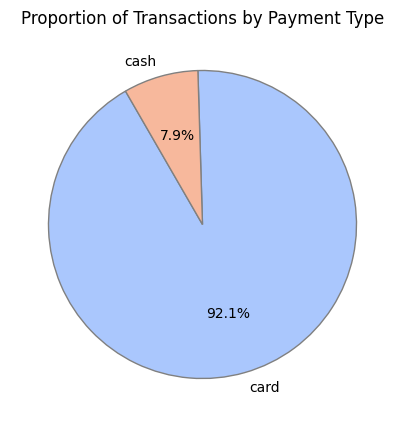

In [13]:
# Analyzing payment method distribution
payment_distribution = data['transaction_mode'].value_counts()
palette = sns.color_palette("coolwarm", n_colors=len(payment_distribution))
plt.figure(figsize=(5, 5))
plt.pie(payment_distribution, labels=payment_distribution.index, autopct='%1.1f%%',
        startangle=120, colors=palette, wedgeprops={'edgecolor': 'gray'})
plt.title("Proportion of Transactions by Payment Type")
plt.show()

In [14]:
# Extracting day of the week for trend analysis
data['day_num'] = data['order_date'].dt.weekday


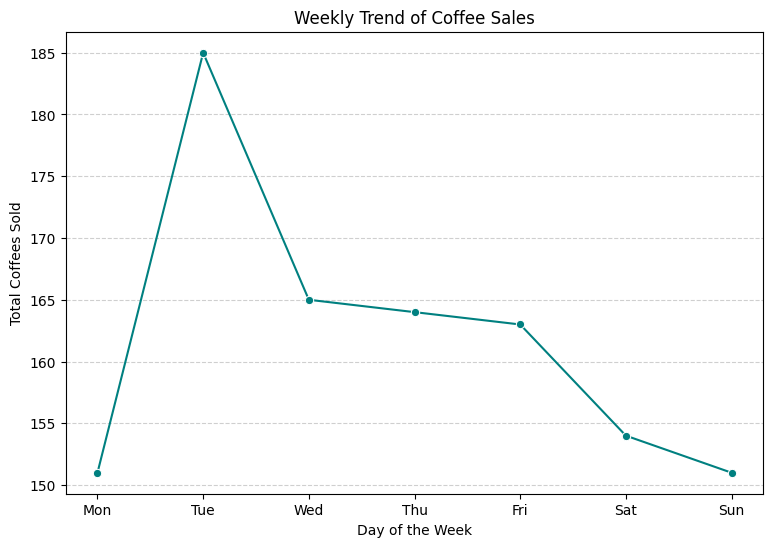

In [15]:
# Counting coffee purchases by day
daily_sales = data.groupby('day_num')['coffee_name'].count()

plt.figure(figsize=(9, 6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, marker='o', color='teal')
plt.title('Weekly Trend of Coffee Sales')
plt.xlabel('Day of the Week')
plt.ylabel('Total Coffees Sold')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

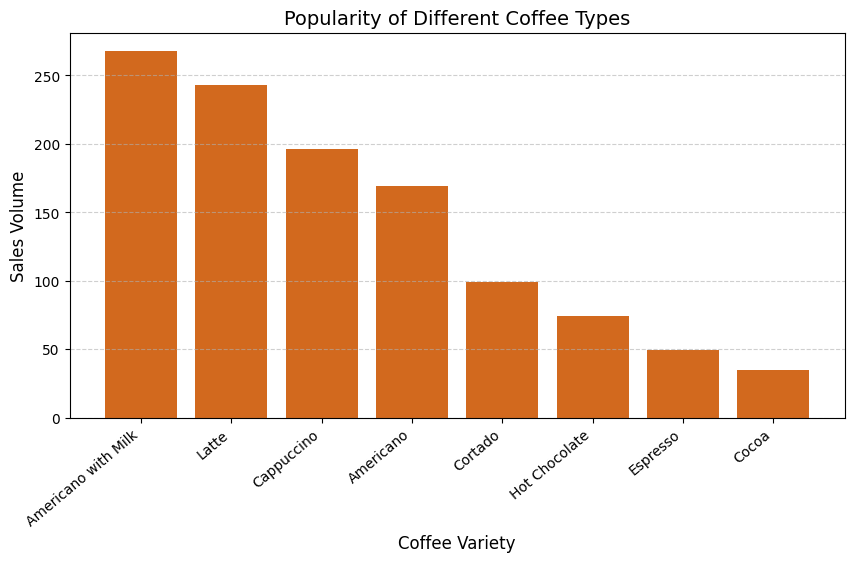

In [16]:
# Analyzing sales volume by coffee variety
coffee_types = data.groupby(by=['coffee_name']).size().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(coffee_types.index, coffee_types.values, color='chocolate')
plt.xlabel("Coffee Variety", fontsize=12)
plt.ylabel("Sales Volume", fontsize=12)
plt.title("Popularity of Different Coffee Types", fontsize=14)
plt.xticks(rotation=40, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

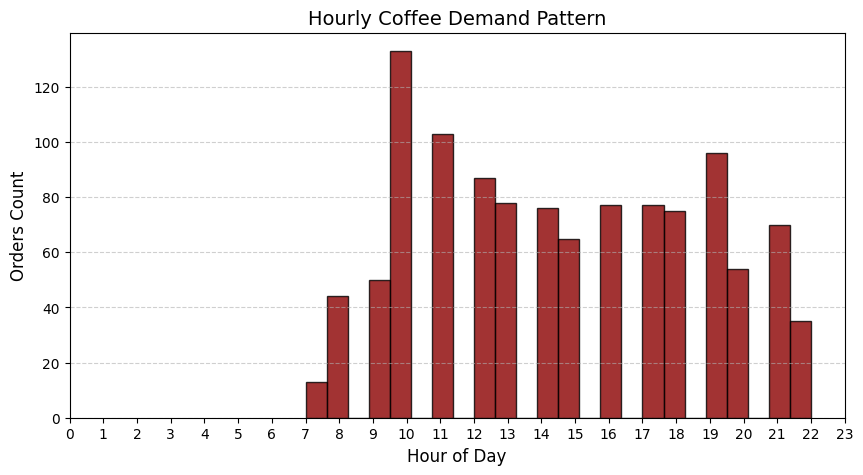

In [17]:
# Extracting hour information for sales pattern analysis
data['order_hour'] = pd.to_datetime(data['formatted_time'], format='%H:%M:%S').dt.hour

plt.figure(figsize=(10, 5))
plt.hist(data['order_hour'], bins=24, color='darkred', edgecolor='black', alpha=0.8)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Orders Count", fontsize=12)
plt.title("Hourly Coffee Demand Pattern", fontsize=14)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

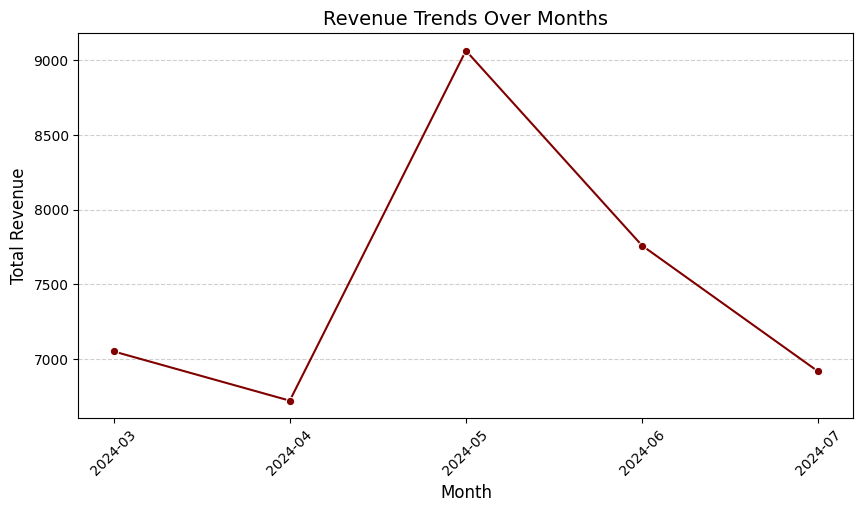

In [18]:
# Monthly revenue trend analysis
data['order_month'] = data['order_date'].dt.to_period('M')
monthly_sales = data.groupby('order_month')['amount'].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o', linestyle='-', color='maroon')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.title("Revenue Trends Over Months", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<ipython-input-19-235358df31e1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_payment.index, y=median_payment.values, palette=['#8B4513', '#CD853F'])


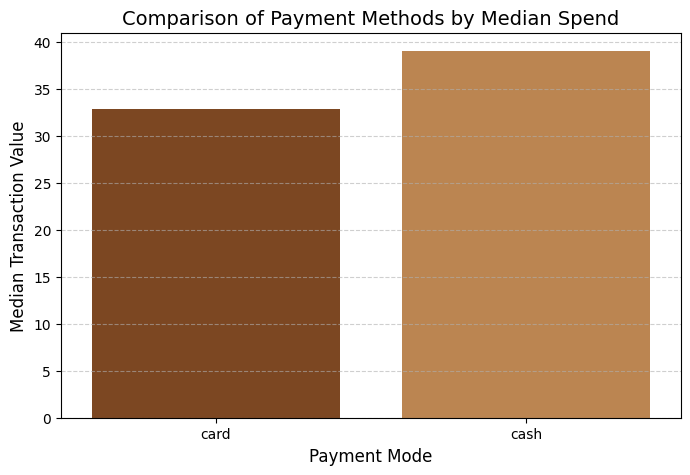

In [19]:
# Comparing median transaction values across payment methods
median_payment = data.groupby('transaction_mode')['amount'].median()

plt.figure(figsize=(8, 5))
sns.barplot(x=median_payment.index, y=median_payment.values, palette=['#8B4513', '#CD853F'])
plt.xlabel("Payment Mode", fontsize=12)
plt.ylabel("Median Transaction Value", fontsize=12)
plt.title("Comparison of Payment Methods by Median Spend", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()